In [1]:
# SVM Classification
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
filename = '/content/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

In [3]:
dataframe

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

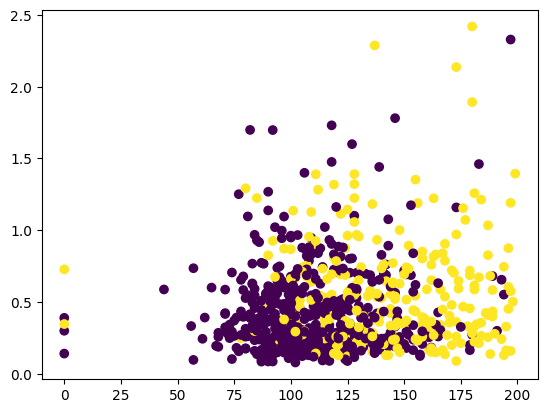

In [5]:
import matplotlib.pyplot as plt
plt.scatter(dataframe['plas'],dataframe['pedi'],c=dataframe['class'])
#try plot with other features as well mass and pedi

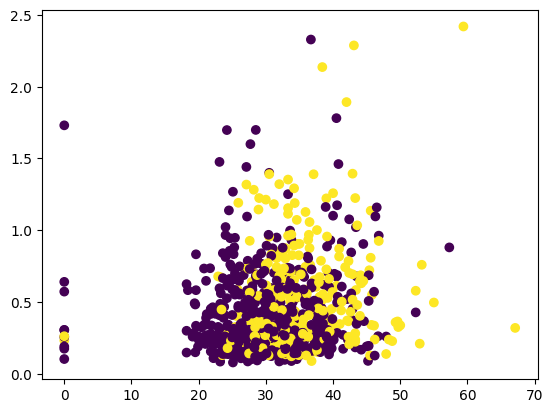

In [6]:
import matplotlib.pyplot as plt
plt.scatter(dataframe['mass'],dataframe['pedi'],c=dataframe['class'])

In [7]:
clf = SVC(kernel='rbf',gamma=0.0001)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
acc=accuracy_score(y_test,y_pred)*100
print("Accuracy= ",acc)
confusion_matrix(y_test,y_pred)

Accuracy=  78.78787878787878


array([[137,   6],
       [ 43,  45]])

In [8]:
clf = SVC(kernel='linear',gamma=0.0001)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy = ", acc)
confusion_matrix(y_test, y_pred)

Accuracy =  78.35497835497836


array([[130,  13],
       [ 37,  51]])

In [13]:
# to get optimal value of gamma use grid search cv
clf = SVC()
# can put ['linear','rbf','poly'], give range for gamma i.e. C as a regularization parameter. Best out of it will be selected by algorithm. rbf-radial bias function
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5,1,0.0001],'C':[1,15,14,13,12,11,10,0.1] }] # 6 X 8 =48 models will be created and will give best out of it.
gsv = GridSearchCV(clf,param_grid,cv=10)
#Fit the GridSearchCV object to the data
gsv.fit(X_train,y_train) #This line is crucial to populate best_params_

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1, 15, 14, 13, 12, 11, 10, 0.1],
                          'gamma': [50, 5, 10, 0.5, 1, 0.0001],
                          'kernel': ['rbf']}])

In [16]:
gsv.best_params_ , gsv.best_score_*100 # 73% accuracy

({'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}, 72.83717679944095)

In [17]:
clf = SVC(C=1,gamma=0.0001,kernel='rbf') # can change kernel and check accuracy
clf.fit(X_train , y_train) #build model
y_pred = clf.predict(X_test)#predict on test dataset
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 78.78787878787878


array([[137,   6],
       [ 43,  45]])

In [18]:
import pickle
# model can not be saved into readable format. It will be converted to binary format.
# Model conversion into binary format is called as Pickling or Serialization.

In [19]:
pickle.dump(clf,open('clf.pkl','wb'))
# dump() will save the model. Pass model name to function,
# open pickle file in write binary mode. File name can be any thing with .pkl extension i.e. clf.pkl
# once this code is run, clf.pkl file will be created automatically & it will be saved in current working directory (Project Deployment in Jupyter)
# We need this clf.pkl file only for deployment purpose.